In [1]:
import cv2
import matplotlib.pyplot as plt
cv2.__version__

'4.4.0'

In [2]:
#**********************
#\\\\\ Call a pretrained model (Haar cascade models)
#**********************
# to use this model, load required XML files (classifier) 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [12]:
#**********************
#\\\\\ Load and read image
#**********************
image = cv2.imread("margot.jpg")
image = cv2.resize(image, (533,800))
# transfer into grayscale mode (to improve efficiency of algorithm?)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

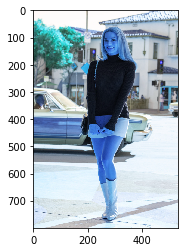

In [4]:
#**********************
#\\\\\ visualization 
#**********************
plt.figure()
plt.imshow(image)

In [5]:
#**********************
#\\\\\ use v2.CascadeClassifier.detectMultiScale() to find faces or eye
#**********************
cv2.CascadeClassifier.detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]])
faces=face_cascade.detectMultiScale(gray_image,scaleFactor=1.10,minNeighbors=3)

In [6]:
for x,y,w,h in faces:
    image=cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0),1)
    cv2.imshow("Face Detector", image)
    k=cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
cv2.imwrite("margot_face_detected.jpeg", image)

True

In [11]:
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)

cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("margot_face_eye_detected.jpeg", image)

True